In [1]:
import tensorflow as tf

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Load Data from Directory

We load data from directory using `tf.data` and split into training and validation subset.

In [3]:
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150
BATCH_SIZE = 32

In [4]:
TRAIN_DIR = "E:/Datasets/IntelEnv/seg_train/seg_train"

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.15,
    subset='training',
    seed=124,
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = 32
)

Found 14034 files belonging to 6 classes.
Using 11929 files for training.


In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.15,
    subset='validation',
    seed=124,
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = 32
)

Found 14034 files belonging to 6 classes.
Using 2105 files for validation.


In [7]:
class_names = train_data.class_names

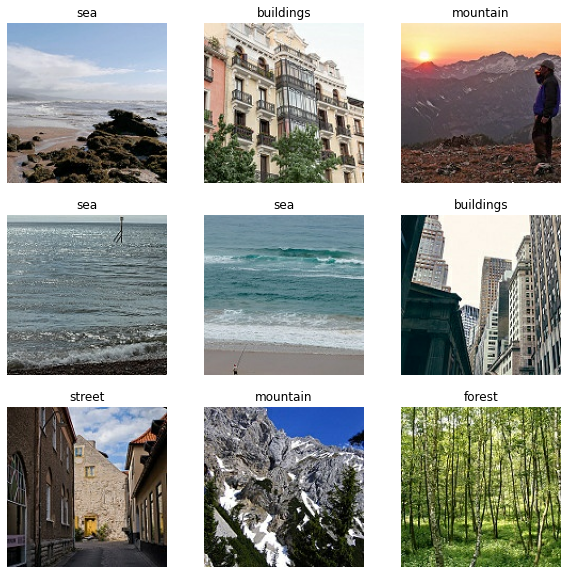

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Build Model

We will now build a model using tensorflow keras api

We use first layer(input layer) as keras preprocessing layer to rescale images to 0-1.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

### Train Model

We compile model using adam optimizer and train for 5 epochs

In [11]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model.fit(train_data, epochs=5)

Epoch 1/5
373/373 [==============================] - 79s 201ms/step - loss: 1.2130 - accuracy: 0.5195
Epoch 2/5
373/373 [==============================] - 22s 58ms/step - loss: 0.6952 - accuracy: 0.7382
Epoch 3/5
373/373 [==============================] - 22s 59ms/step - loss: 0.5195 - accuracy: 0.8145
Epoch 4/5
373/373 [==============================] - 22s 58ms/step - loss: 0.3738 - accuracy: 0.8699
Epoch 5/5
373/373 [==============================] - 22s 59ms/step - loss: 0.2700 - accuracy: 0.9011


### Evaluate
Evaluate model performance.

In [14]:
model.evaluate(val_data)

66/66 [==============================] - 14s 177ms/step - loss: 0.7341 - accuracy: 0.7691


[0.7341166734695435, 0.7691211104393005]

In [16]:
resp = model.predict(val_data)

In [37]:
class_names[np.argmax(resp[0])]

'glacier'

In [53]:
import numpy as np

In [38]:
import cv2

In [39]:
image = cv2.imread(TRAIN_DIR + "/forest/8.jpg")

In [46]:
np.expand_dims(image, axis=0).shape

(1, 150, 150, 3)

In [48]:
resp = model.predict(np.expand_dims(image, axis=0))

### Save and Load

Save model in directory then load and infer on an image

In [55]:
model.save("inetlenv")

INFO:tensorflow:Assets written to: inetlenv\assets


In [56]:
import tensorflow as tf

my_model = tf.keras.models.load_model("inetlenv")

image = cv2.imread(TRAIN_DIR + "/forest/8.jpg")
resp = model.predict(np.expand_dims(image, axis=0))
class_names[np.argmax(resp)]